## Topic Modelling
Topic modelling is an unsupervised machine learning method that helps us discover hidden semantic structures in a paper, that allows us to learn topic representations of papers in a corpus. The model can be applied to any kinds of labels on documents, such as tags on posts on the website.


In [ ]:
# Setup
import warnings; warnings.simplefilter('ignore')
# set this to your working directory
WORKING_DIR = 'C:/Users/HuyenNguyen/Dropbox (Erasmus Universiteit Rotterdam)/Hamburg/TEACHING_UHH/WiSo21-22/Text Analysis for Social Sciences in Python/Exercises/W10'
import os
from txt_utils import WORK_DIR
os.chdir(WORKING_DIR)
%matplotlib inline
import pandas as pd
import numpy as np

In [20]:
#Import file
df1 = pd.read_csv('death-penalty-cases.csv')


In [3]:
#Import 2 other data files
X = pd.read_pickle('X.pkl')
X_tfidf = pd.read_pickle('X_tfidf.pkl')

### Cosine Similarity

In [4]:

# compute pair-wise similarities between all documents in corpus"
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(X[:100])
sim.shape

(100, 100)

In [5]:
sim[:3,:3]

array([[1.        , 0.64536327, 0.5147311 ],
       [0.64536327, 1.        , 0.6131333 ],
       [0.5147311 , 0.6131333 , 1.        ]])

In [6]:
tsim = cosine_similarity(X_tfidf[:100])
tsim[:3,:3]

array([[1., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.]])

### K-means clustering

In [7]:
# create 100 clusters of similar documents
from sklearn.cluster import KMeans
num_clusters = 100
km = KMeans(n_clusters=num_clusters,n_jobs=-1)
km.fit(X_tfidf[:1000])
doc_clusters = km.labels_.tolist()
dfs = df1[:1000]
dfs['cluster'] = doc_clusters
dfs[dfs['cluster']==1]['snippet']

719    that in all other cases (except probation and ...
883    Imposition of the Death Penalty. Thompson also...
884    impose the death penalty. He urges that he was...
885    quot;expressed an inability to... vote for the...
886    court committed harmful error. Indeed, with th...
887    with capital murder which could result in the ...
888    was opposed to the death penalty and could not...
889    of the death penalty. The judge followed the j...
Name: snippet, dtype: object

### Latent Dirichlet Allocation

The following steps show you how to run gensim on the corpus and train LDA. gensim provides the best impementation of LDA in Python (gensim.models.LdaModel)

It works well on arbitrarily large corpora, with intuitive and fast outcomes.

In [8]:
# clean document
from utils import clean_document
doc_clean = [clean_document(doc) for doc in df1['snippet'][:1000]]
# note: removed 'death' and 'penalty'

In [9]:
# randomize document order
from random import shuffle
shuffle(doc_clean)

In [10]:
# creating the term dictionary
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)

In [11]:
# creating the document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [12]:
# train LDA with 10 topics and print
from gensim.models.ldamodel import LdaModel
lda = LdaModel(doc_term_matrix, num_topics=10, 
               id2word = dictionary, passes=3)
lda.show_topics(formatted=False)

[(0,
  [('impos', 0.032255124),
   ('defend', 0.024547411),
   ('case', 0.024319781),
   ('court', 0.021446405),
   ('state', 0.018979922),
   ('juri', 0.017714286),
   ('murder', 0.016359536),
   ('juror', 0.014175377),
   ('statut', 0.013524098),
   ('trial', 0.013006696)]),
 (1,
  [('murder', 0.024722185),
   ('court', 0.021993902),
   ('impos', 0.021597654),
   ('case', 0.021185497),
   ('juri', 0.018307839),
   ('first', 0.017861811),
   ('statut', 0.016082529),
   ('trial', 0.016007503),
   ('degre', 0.014660963),
   ('appel', 0.013336817)]),
 (2,
  [('state', 0.0266284),
   ('case', 0.020474982),
   ('texa', 0.019303462),
   ('seek', 0.018667398),
   ('impos', 0.017383663),
   ('appel', 0.015354477),
   ('scheme', 0.013382435),
   ('error', 0.011236556),
   ('judgment', 0.010094581),
   ('appeal', 0.008828136)]),
 (3,
  [('statut', 0.036336824),
   ('state', 0.035978716),
   ('case', 0.024984429),
   ('impos', 0.021871472),
   ('court', 0.021040754),
   ('appel', 0.014488685),
 

In [13]:
# to get the topic proportions for a document, use
# the corresponding row from the document-term matrix.
lda[doc_term_matrix[0]]

[(0, 0.4033387), (9, 0.56588566)]

In [14]:
# or, for all documents
[lda[d] for d in doc_term_matrix]

[[(0, 0.40340346), (9, 0.5658209)],
 [(9, 0.9780451)],
 [(5, 0.9718673)],
 [(4, 0.9666582)],
 [(4, 0.31200296), (5, 0.6516273)],
 [(0, 0.5321991), (5, 0.20675743), (6, 0.23303752)],
 [(0, 0.48297188),
  (1, 0.014289464),
  (2, 0.0142880315),
  (3, 0.014288223),
  (4, 0.014288713),
  (5, 0.014288877),
  (6, 0.014289915),
  (7, 0.014288576),
  (8, 0.014288901),
  (9, 0.40271744)],
 [(1, 0.8755034), (8, 0.10226859)],
 [(5, 0.9718695)],
 [(2, 0.9735231)],
 [(9, 0.9624918)],
 [(9, 0.9718667)],
 [(0, 0.48137084), (4, 0.23663545), (9, 0.25698742)],
 [(8, 0.9709619)],
 [(9, 0.9666583)],
 [(9, 0.9709592)],
 [(4, 0.6192431), (9, 0.3549432)],
 [(1, 0.09954485), (9, 0.87822825)],
 [(5, 0.9689581)],
 [(3, 0.09617606), (8, 0.87304723)],
 [(6, 0.9718695)],
 [(5, 0.6857652), (7, 0.2884226)],
 [(0, 0.6927665), (5, 0.27964094)],
 [(9, 0.9639908)],
 [(3, 0.40206587), (7, 0.54791886)],
 [(5, 0.96999085)],
 [(1, 0.73975044), (5, 0.23357543)],
 [(7, 0.9735231)],
 [(0, 0.010001094),
  (1, 0.010000678),
  (2,

### LDA Word Clouds

In [15]:
#Import relevant packages

from numpy.random import randint
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
# make directory if not exists
from os import mkdir
try:
    mkdir('lda')
except:
    pass

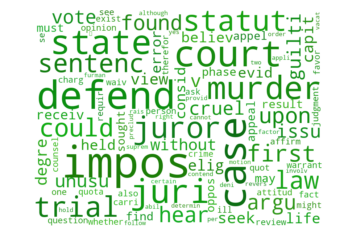

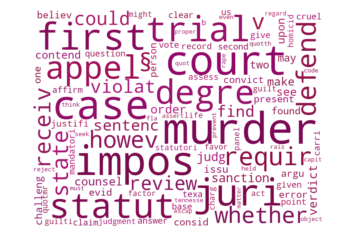

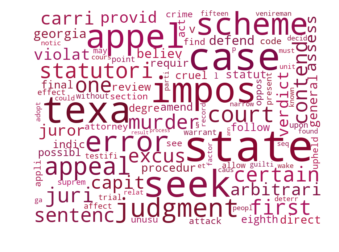

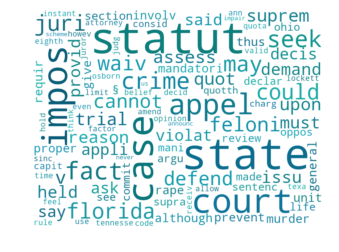

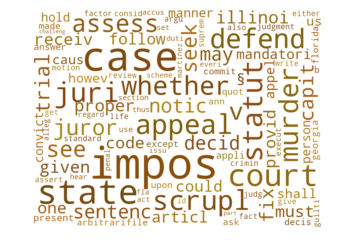

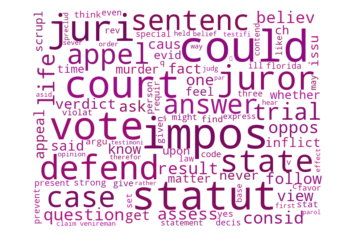

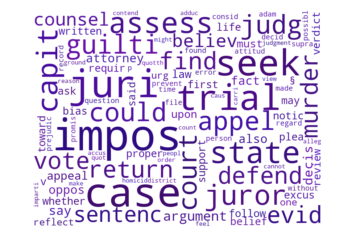

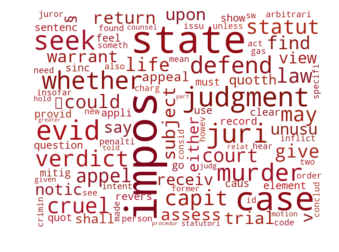

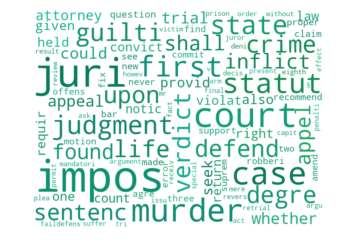

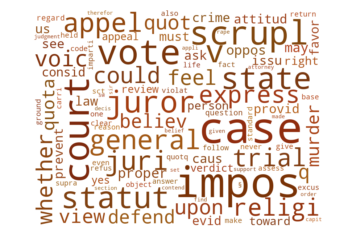

In [17]:
# make word clouds for the topics
for i,weights in lda.show_topics(num_topics=-1,
                                 num_words=100,
                                 formatted=False):
    #logweights = [w[0], np.log(w[1]) for w in weights]
    maincol = randint(0,360)
    def colorfunc(word=None, font_size=None, 
                  position=None, orientation=None, 
                  font_path=None, random_state=None):   
        color = randint(maincol-10, maincol+10)
        if color < 0:
            color = 360 + color
        return "hsl(%d, %d%%, %d%%)" % (color,randint(65, 75)+font_size / 7, randint(35, 45)-font_size / 10)   

    
    wordcloud = WordCloud(background_color="white", 
                          ranks_only=False, 
                          max_font_size=120,
                          color_func=colorfunc,
                          height=600,width=800).generate_from_frequencies(dict(weights))

    plt.clf()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()


## BERT Embeddings (Christmas holiday tutorial & exercise)

https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/#why-bert-embeddings

Your task: Apply TF-IDF/Bag of Words, Word Embeddings, LDA Topic Model and BERT embeddings on a given corpus (to be sent later). Specific list of tasks will be given.

Submission deadline: Monday 10.01.2022 (to gain 0.3 upgrade bonus in the final grade).
